# Building a Recurrent Neural Network

## Sentiment Analysis
In this project, we will build a Long Short-term Memory (LSTM) neural network to solve a binary sentiment analysis problem.

For this, we'll use the “IMDB Movie Review Dataset" available on Keras. It includes 50000 highly polarized movie reviews categorized as positive or negative.

In [2]:
# Import TensorFlow
import tensorflow as tf
# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Download the IMDB dataset included in Keras
# Set the parameter num_words to 10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
# Print a sample
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
# Print the number of samples
print("X_train:", len(X_train))
print("X_test:", len(X_test))

X_train: 25000
X_test: 25000


In [6]:
# Concatenate X_train and X_test and assing it to a variable X
X = np.concatenate((X_train, X_test), axis=0)

# Concatenate y_train and y_test and assing it to a variable y
y = np.concatenate((y_train, y_test), axis=0)

In [7]:
# Pad all reviews in the X dataset to the length maxlen=1024
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=1024)

In [8]:
# Create the training datasets
X_train = X[:40000]
y_train = y[:40000]

# Create the validation datasets
X_val = X[40000:45000]
y_val = y[40000:45000]

# Create the test datasets
X_test = X[45000:50000]
y_test = y[45000:50000]

In [9]:
# Print the number of samples
print("X_train:", len(X_train))
print("y_train:", len(y_train))
print("X_val:", len(X_val))
print("y_val:", len(y_val))
print("X_test:", len(X_test))
print("y_test:", len(y_test))

X_train: 40000
y_train: 40000
X_val: 5000
y_val: 5000
X_test: 5000
y_test: 5000


In [10]:
# Create a model object
model = tf.keras.Sequential()

In [11]:
# Add an embedding layer and a dropout
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

In [12]:
# Add a LSTM layer with dropout
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))

# Add a Dense layer with dropout
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [13]:
# Add the output layer
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model for 5 epochs
results = model.fit(X_train, y_train,
                    epochs=5, 
                    validation_data=(X_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 93s 69ms/step - loss: 0.5122 - accuracy: 0.7471 - val_loss: 0.4028 - val_accuracy: 0.8392
Epoch 2/5
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3381 - accuracy: 0.8694 - val_loss: 0.3000 - val_accuracy: 0.8812
Epoch 3/5
1250/1250 [==============================] - 87s 70ms/step - loss: 0.2952 - accuracy: 0.8910 - val_loss: 0.2705 - val_accuracy: 0.8934
Epoch 4/5
1250/1250 [==============================] - 88s 70ms/step - loss: 0.2830 - accuracy: 0.8942 - val_loss: 0.3526 - val_accuracy: 0.8406
Epoch 5/5
1250/1250 [==============================] - 87s 70ms/step - loss: 0.2007 - accuracy: 0.9275 - val_loss: 0.2474 - val_accuracy: 0.9016


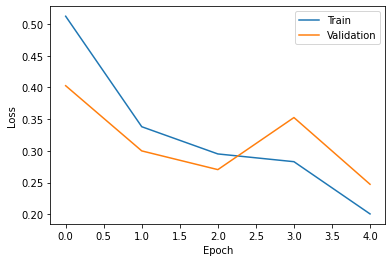

In [18]:
# Plot the the training loss
plt.plot(results.history["loss"], label='Train')

# Plot the the validation loss
plt.plot(results.history["val_loss"], label='Validation')

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

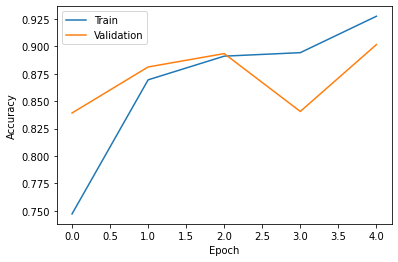

In [19]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label='Train')

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label='Validation')

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [20]:
# Evaluate the performance
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 26ms/step - loss: 0.2505 - accuracy: 0.9012


[0.25051987171173096, 0.901199996471405]

In [21]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,1024))
print(f"Label: {y_test[789]} | Prediction: {prediction_result}")

Label: 0 | Prediction: [[0.02328568]]
